In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report


In [8]:

# Load the dataset
file_path = 'spam_ham_dataset.csv'  # Adjust this path if necessary
data = pd.read_csv(file_path)



In [9]:
# Display basic dataset information
print("Dataset Shape:", data.shape)


Dataset Shape: (5171, 4)


In [10]:
print("Columns:", data.columns)

Columns: Index(['Unnamed: 0', 'label', 'text', 'label_num'], dtype='object')


In [15]:
print(data.head())

   Unnamed: 0 label                                               text  \
0         605   ham  Subject: enron methanol ; meter # : 988291\r\n...   
1        2349   ham  Subject: hpl nom for january 9 , 2001\r\n( see...   
2        3624   ham  Subject: neon retreat\r\nho ho ho , we ' re ar...   
3        4685  spam  Subject: photoshop , windows , office . cheap ...   
4        2030   ham  Subject: re : indian springs\r\nthis deal is t...   

   label_num  
0          0  
1          0  
2          0  
3          1  
4          0  


In [17]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [71]:


# Preprocessing
# Rename columns if necessary
if 'text' not in data.columns:
    data.rename(columns={'Message': 'text', 'Category': 'label'}, inplace=True)

# Map labels to binary format (e.g., 'spam' -> 1, 'ham' -> 0)
data['label'] = data['label'].map({'spam': 1, 'ham': 0})

# Check for missing values
print("Missing values:\n", data.isnull().sum())


Missing values:
 Unnamed: 0    0
label         0
text          0
label_num     0
dtype: int64


In [21]:
# Separate features (X) and target (y)
X = data['text']
y = data['label']

# Split into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [23]:
# Text vectorization using TF-IDF
tfidf = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [24]:
# Train Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_tfidf, y_train)


MultinomialNB()

In [27]:
# Evaluate Naive Bayes classifier
y_pred_nb = nb_classifier.predict(X_test_tfidf)
print("\nNaive Bayes Classifier Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))



Naive Bayes Classifier Accuracy: 0.9526570048309179
              precision    recall  f1-score   support

         ham       0.97      0.96      0.97       735
        spam       0.90      0.94      0.92       300

    accuracy                           0.95      1035
   macro avg       0.94      0.95      0.94      1035
weighted avg       0.95      0.95      0.95      1035



In [29]:
# Train SVM classifier
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train_tfidf, y_train)


SVC(kernel='linear', probability=True, random_state=42)

In [41]:

# Evaluate SVM classifier
y_pred_svm = svm_model.predict(X_test_tfidf)
print("\nSVM Classifier Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))



SVM Classifier Accuracy: 0.9864734299516909
              precision    recall  f1-score   support

         ham       0.99      0.99      0.99       735
        spam       0.97      0.98      0.98       300

    accuracy                           0.99      1035
   macro avg       0.98      0.98      0.98      1035
weighted avg       0.99      0.99      0.99      1035



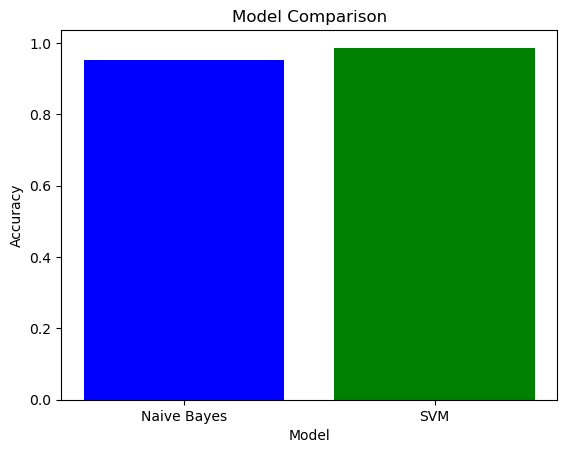

In [43]:


# Assuming y_test, y_pred_nb, and y_pred_svm are defined earlier in the code
# Collect metrics for comparison
models = ['Naive Bayes', 'SVM']
accuracy = [accuracy_score(y_test, y_pred_nb), accuracy_score(y_test, y_pred_svm)]

# Plot comparison
plt.bar(models, accuracy, color=['blue', 'green'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()


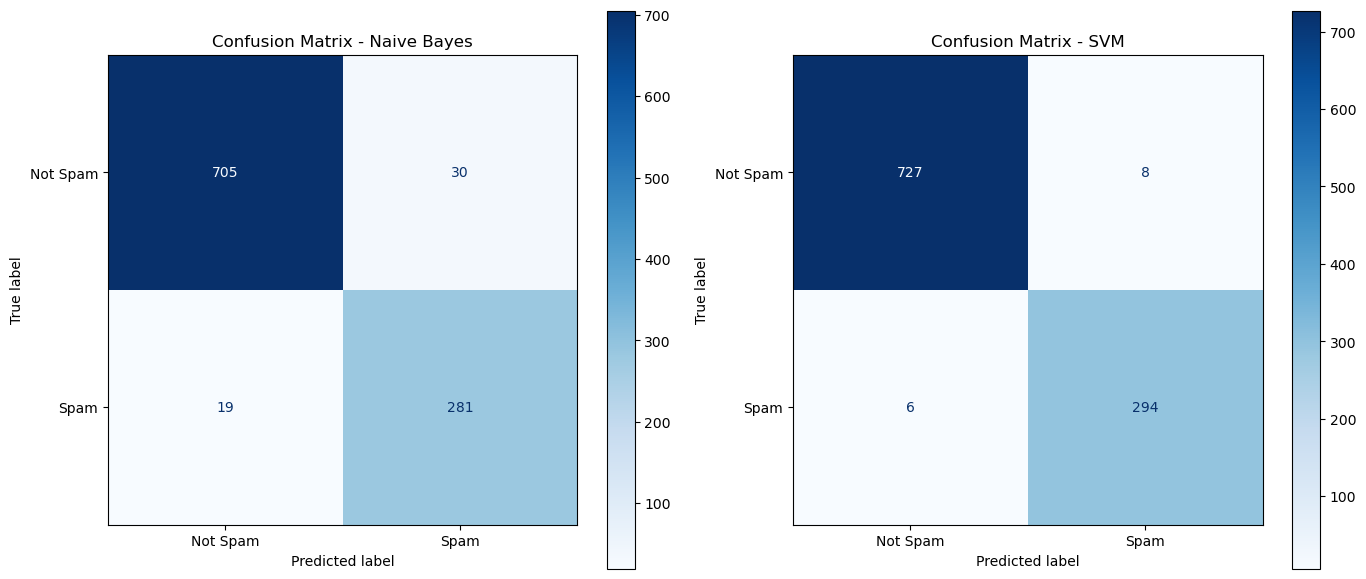

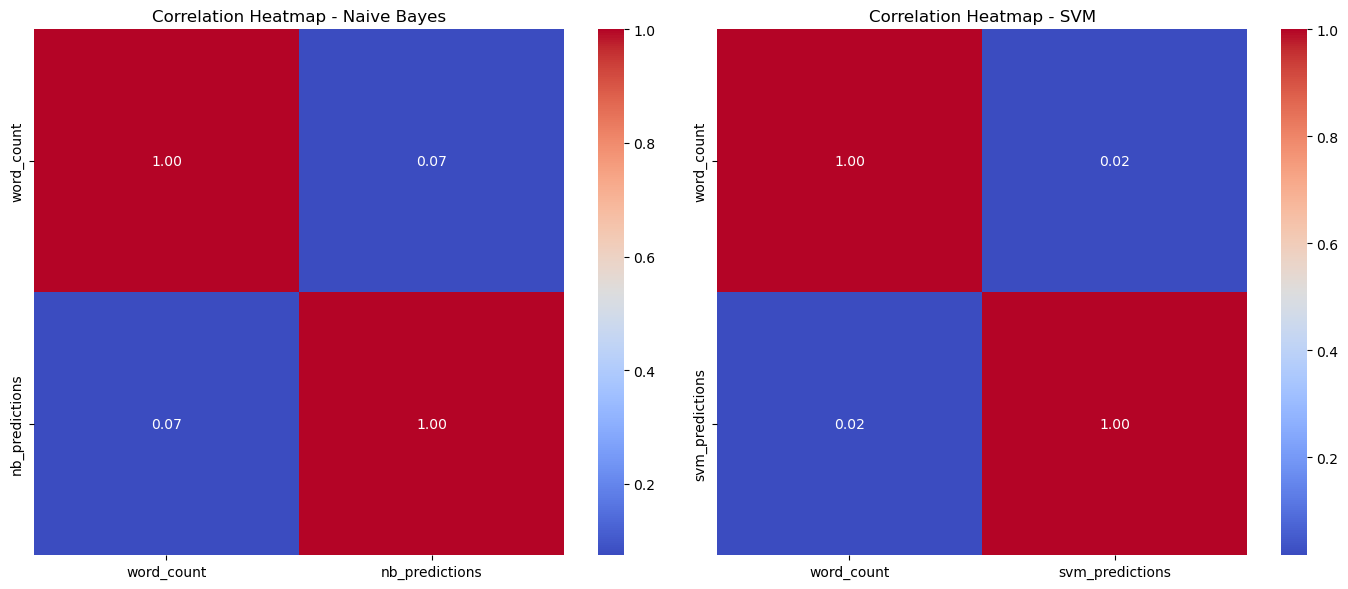

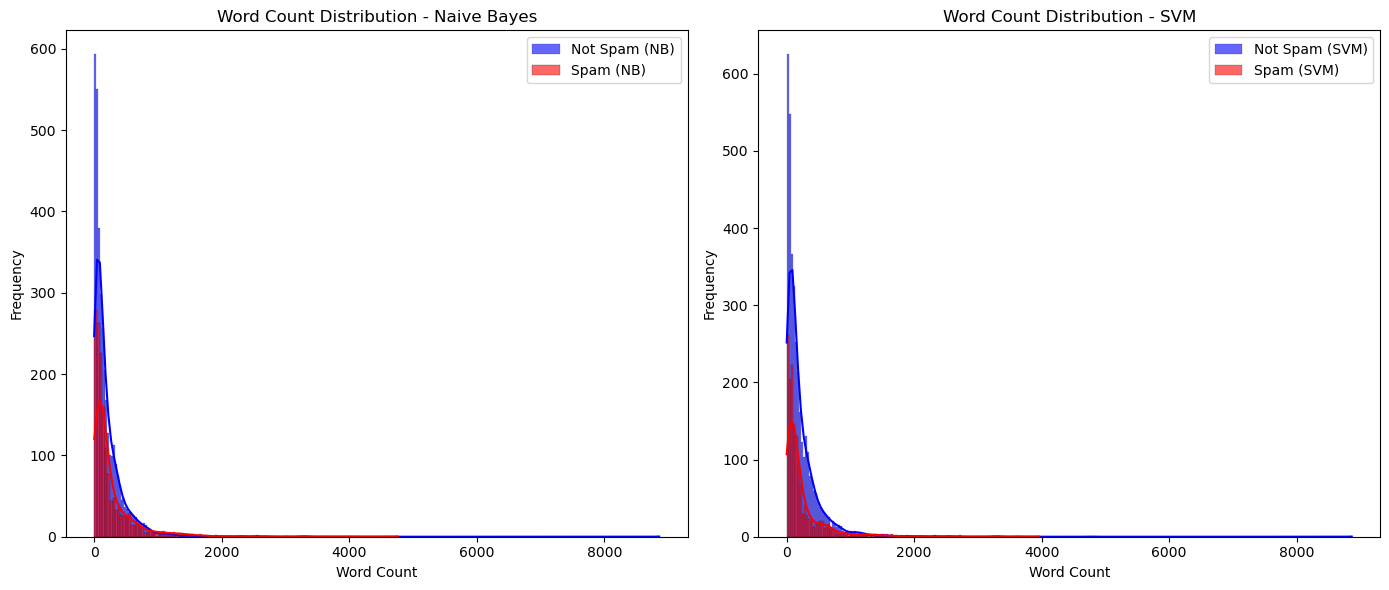

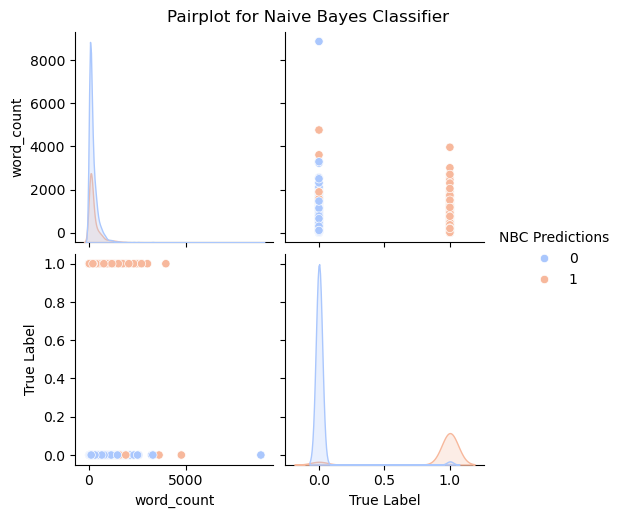

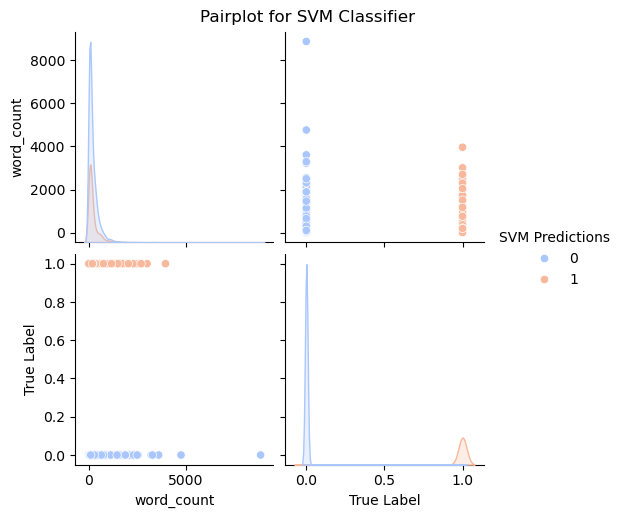

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
cm_nb = confusion_matrix(y_test, y_pred_nb)
cm_svm = confusion_matrix(y_test, y_pred_svm)

disp_nb = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=['Not Spam', 'Spam'])
disp_nb.plot(cmap='Blues', ax=axes[0])
axes[0].set_title("Confusion Matrix - Naive Bayes")

disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['Not Spam', 'Spam'])
disp_svm.plot(cmap='Blues', ax=axes[1])
axes[1].set_title("Confusion Matrix - SVM")

plt.tight_layout()
plt.show()

# Correlation heatmaps side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# NBC Correlation
data['nb_predictions'] = nb_classifier.predict(tfidf.transform(data['text']))
data_corr_nb = data[['word_count', 'nb_predictions']].corr()
sns.heatmap(data_corr_nb, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[0])
axes[0].set_title("Correlation Heatmap - Naive Bayes")

# SVM Correlation
data['svm_predictions'] = svm_model.predict(tfidf.transform(data['text']))
data_corr_svm = data[['word_count', 'svm_predictions']].corr()
sns.heatmap(data_corr_svm, annot=True, cmap='coolwarm', fmt=".2f", ax=axes[1])
axes[1].set_title("Correlation Heatmap - SVM")

plt.tight_layout()
plt.show()

# Word count histograms side by side
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# NBC Histogram
sns.histplot(data[data['nb_predictions'] == 0]['word_count'], label="Not Spam (NB)", kde=True, color='blue', alpha=0.6, ax=axes[0])
sns.histplot(data[data['nb_predictions'] == 1]['word_count'], label="Spam (NB)", kde=True, color='red', alpha=0.6, ax=axes[0])
axes[0].legend()
axes[0].set_title("Word Count Distribution - Naive Bayes")
axes[0].set_xlabel("Word Count")
axes[0].set_ylabel("Frequency")

# SVM Histogram
sns.histplot(data[data['svm_predictions'] == 0]['word_count'], label="Not Spam (SVM)", kde=True, color='blue', alpha=0.6, ax=axes[1])
sns.histplot(data[data['svm_predictions'] == 1]['word_count'], label="Spam (SVM)", kde=True, color='red', alpha=0.6, ax=axes[1])
axes[1].legend()
axes[1].set_title("Word Count Distribution - SVM")
axes[1].set_xlabel("Word Count")
axes[1].set_ylabel("Frequency")

plt.tight_layout()
plt.show()


# Pairplot data preparation for comparison
nb_pairplot_data = data[['word_count', 'label', 'nb_predictions']].dropna()  # Drop NaN rows
nb_pairplot_data.rename(columns={'label': 'True Label', 'nb_predictions': 'NBC Predictions'}, inplace=True)
# NBC Pairplot
nb_plot = sns.pairplot(nb_pairplot_data, hue='NBC Predictions', palette='coolwarm')
nb_plot.fig.suptitle("Pairplot for Naive Bayes Classifier", y=1.02)  # Adjust title position
plt.show()

svm_pairplot_data = data[['word_count', 'label', 'svm_predictions']].dropna()  # Drop NaN rows
svm_pairplot_data.rename(columns={'label': 'True Label', 'svm_predictions': 'SVM Predictions'}, inplace=True)
# SVM Pairplot
svm_plot = sns.pairplot(svm_pairplot_data, hue='SVM Predictions', palette='coolwarm')
svm_plot.fig.suptitle("Pairplot for SVM Classifier", y=1.02)  # Adjust title position
plt.show()




Best Model: SVM


In [43]:

# Example: Classify a new email
new_email = "Urgent meeting at the office!"
result = classify_new_email(new_email, tfidf, best_model)
print("\nClassification Result for New Email:", result)


Classification Result for New Email: Not Spam


In [45]:
# Example: Classify a new email
new_email = "Win an exclusive offer today! Claim now!"
result = classify_new_email(new_email, tfidf, best_model)
print("\nClassification Result for New Email:", result) 


Classification Result for New Email: Spam


In [51]:
new_email = "Win a new Iphone today for free!"
result = classify_new_email(new_email, tfidf, best_model)
print("\nClassification Result for New Email:", result) 


Classification Result for New Email: Spam


In [49]:
new_email = "This is new opportunity to kick start the course on Machine Learning"
result = classify_new_email(new_email, tfidf, best_model)
print("\nClassification Result for New Email:", result) 


Classification Result for New Email: Not Spam
